In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

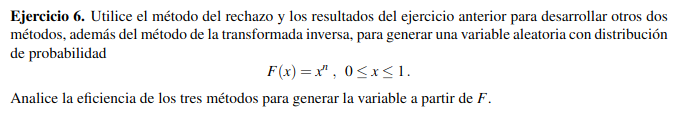

Si la funcion de distribucion acomulada de X es
$$
F(x) = x^n \quad 0 \leq x \leq 1
$$

Entonces podemos definir la funcion de densidad de probabilidad como la derivada:
$$
f(x) = \frac{dF(x)}{dx} = n x^{n-1}
$$


Teniendo estas funciones, podemos generar a X por el metodo de la transformada inversa obteniendo $F^{-1}(U)$ donde U es una variable aleatoria uniforme en [0,1]. Entonces:
$$
u = x^n \\
\sqrt[n]{u} = x \\
u^{1/n} = x
$$
Para todo u en [0,1]

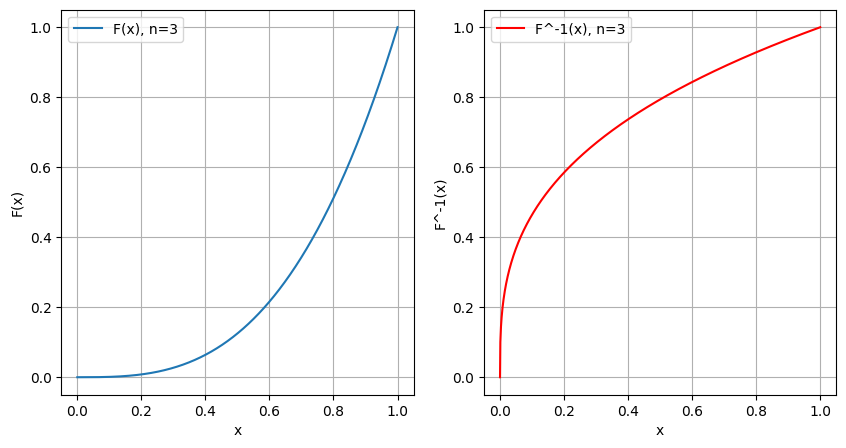

In [14]:
def F(x, n):
    return x**n

def inv_F(x, n):
    return x**(1/n)

# create image with two graphs, one for x^n and one for x^(1/n)
x_arr = np.linspace(0, 1, 1000)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
y_arr = [F(x, 3) for x in x_arr]
axes[0].plot(x_arr, y_arr, label='F(x), n=3')
axes[0].set_xlabel('x')
axes[0].set_ylabel('F(x)')
y_arr = [inv_F(x, 3) for x in x_arr]
axes[1].plot(x_arr, y_arr, color='red', label='F^-1(x), n=3')
axes[1].set_xlabel('x')
axes[1].set_ylabel('F^-1(x)')

for i in range(2):
    axes[i].legend()
    axes[i].grid()

plt.show()

### Generador por transformada inversa

In [16]:
""" 
Metodo para generar valores de la variable aleatoria X a partir de la 
inversa de la funcion de distribucion 
"""
def gen_tinversa_F(n):
    u = rd.random()
    return inv_F(u, n)

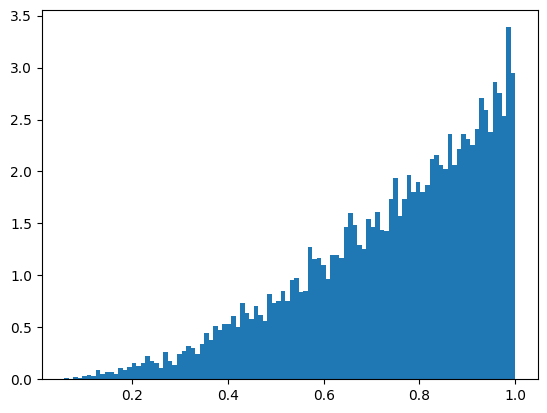

In [29]:
tinv_f = [gen_tinversa_F(3) for i in range(10000)]
plt.hist(tinv_f, bins=100, density=True)
plt.show()

### Generador con distribucion del maximo de una muestra

Usando el resultado del ejercicio anterior donde teniamos:
$$
F_M(x) = \prod_{i=1}^{n} F_i(x)
$$
Donde $F_i(x)$ es la funcion de distribucion acumulada de la variable $X_i$ y $F_M(x)$ es la funcion de distribucion acumulada de la variable $X_M = max(X_1, X_2, ..., X_n)$. Y su funcion de distribucion es $F_{X_M}(x) = [F_i(x)]^n$.

Entonces si decimos que $X_i$ tiene funcion de distribucion acumulada $F_i(x) = x \text{  tal que  } 0 \leq x \leq 1$ entonces para poder generar a $X_M$ necesitamos generar a $X_1, X_2, ..., X_n$ y tomar el maximo de ellos. 

In [31]:
# Para generar utilizando aceptacion y rechazo, debo generar
# n valores aleatorios de una uniforme entre 0 y 1 (X_i)
# y luego tomo el maximo de esos valores
def gen_arechazo_F(n):
    X = [rd.random() for i in range(n)]
    return max(X)

# manera alternativa haciendo el producto de todos esos valores de la uniforme
def gen_arechazo_F2(n):
    X = [rd.random() for i in range(n)]
    return np.prod(X)

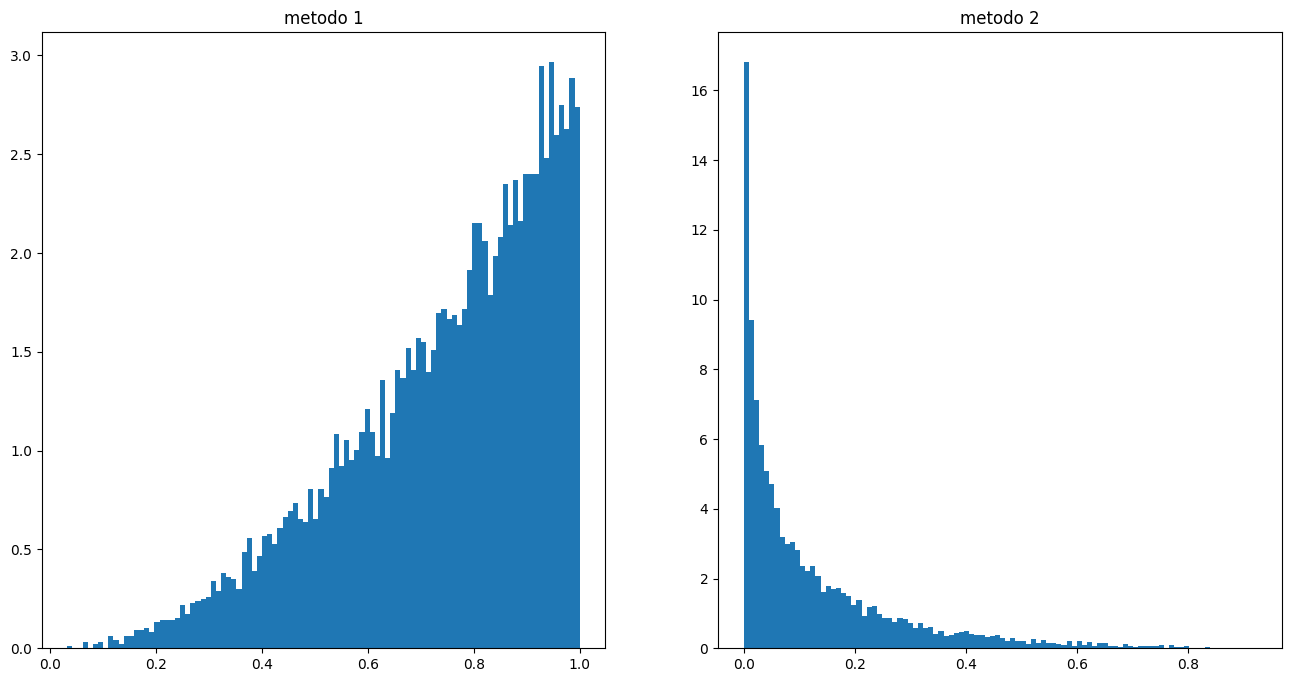

In [32]:
# genero histogramas para las dos formas 
arechazo_f = [gen_arechazo_F(3) for i in range(10000)]
arechazo_f2 = [gen_arechazo_F2(3) for i in range(10000)]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].hist(arechazo_f, bins=100, density=True)
axes[0].set_title('metodo 1')
axes[1].hist(arechazo_f2, bins=100, density=True)
axes[1].set_title('metodo 2')
plt.show()

### Generador de rechazo contra unfiforme

Buscamos generar $F(x) = x^n$ rechazando contra una uniforme entre [0,1]. Para esto debemos encontrar una cota c tal que:
$$
\frac{f(x)}{g(x)} \leq c
$$

sabemos que $f(x) = n x^{n-1}$ y $g(x) = 1$ entonces formamos la funcion h(x) tal que:
$$
h(x) = \frac{f(x)}{g(x)} = n x^{n-1} \\
\text{ Como }x \in [0,1] \text{ y h(x)es estrictamente creciente, entonces toma su maximo cuando x = 1} \\
h(1) = n \\
\text{ Entonces la cota c es n}
$$

Ademas:
$$
\frac{f(x)}{c g(x)} = \frac{n x^{n-1}}{n} = x^{n-1} 
$$

y el algoritmo de rechazo contra uniforme queda:

In [47]:
def gen_rechazo_F_u(n):
    while True:
        y = rd.random() # genero el valor de Y ~ U(0, 1)
        u = rd.random() 
        if u < y**(n-1):
            return y

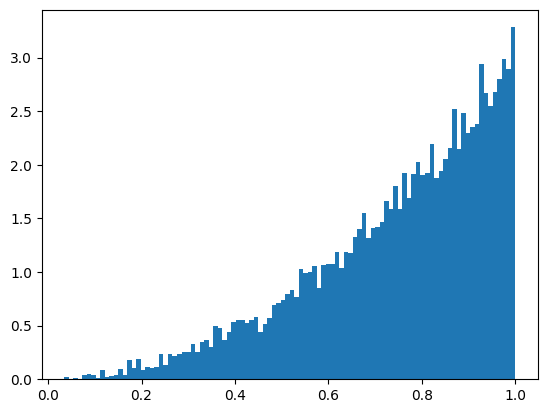

In [50]:
# genero un histograma del generador con rechazo contra uniforme
rechazo_f = [gen_rechazo_F_u(3) for i in range(10000)]
plt.hist(rechazo_f, bins=100, density=True)
plt.show()